<a href="https://colab.research.google.com/github/JARACH-209/Deep_Learning/blob/main/Stacked_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoder!


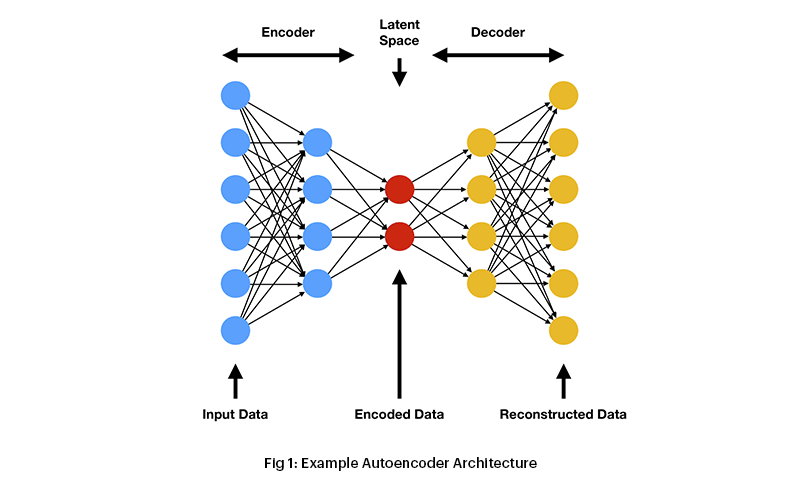

##Now, what is **stacked** autoencoder ?

DO NOT confuse with DEEP!

(A lot of articles, tuts, and other will sell DEEP autoencoders in name of Stacked AE)


In 2010 Stacked Deno-AE paper, Stacking was referred to the use of multiple layers. Deep Networks exists after 2011.

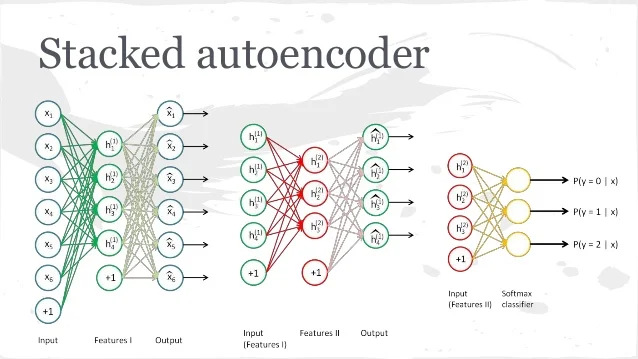




## Stack Any kind of AE

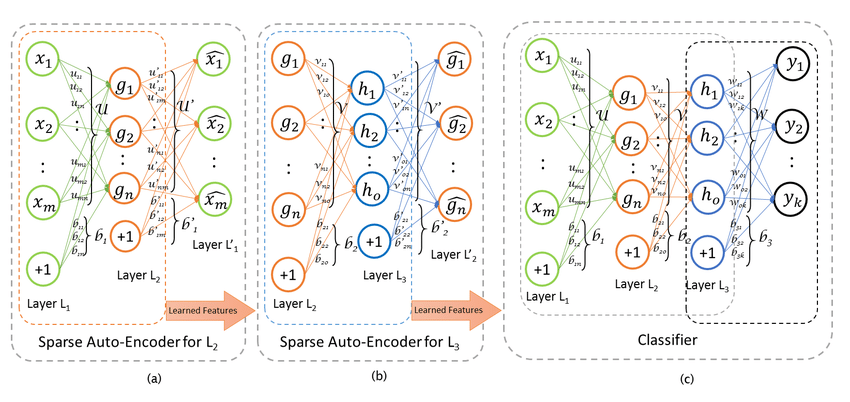

##Training an AE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from IPython.display import SVG
from tensorflow.keras.utils import plot_model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

In [15]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
                    layers.Flatten(),
                    layers.Dense(latent_dim, activation='relu'),
                    ])
    self.decoder = tf.keras.Sequential([
                    layers.Dense(784, activation='sigmoid'),
                    layers.Reshape((28, 28))
                    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)


In [16]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

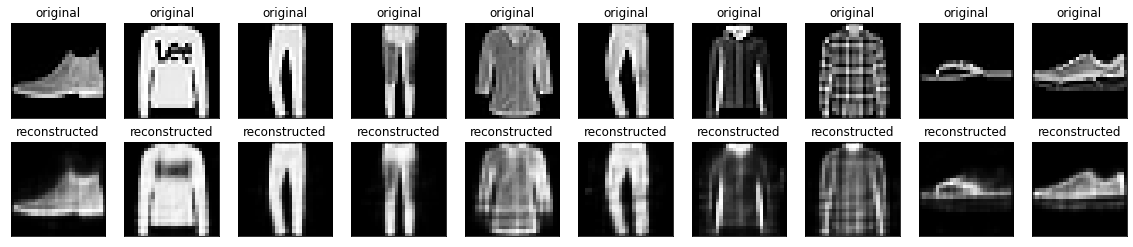

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
plot_model(autoencoder)

dict_keys(['loss', 'val_loss'])


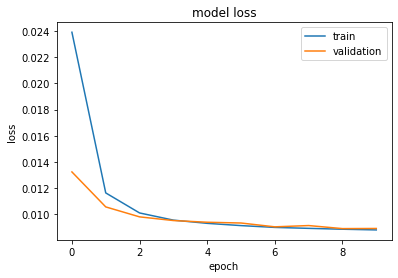

In [17]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Training a simple CNN

In [2]:
batch_size = 32
img_height = 180
img_width = 180

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


228827136/228813984 [==============================] - 2s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


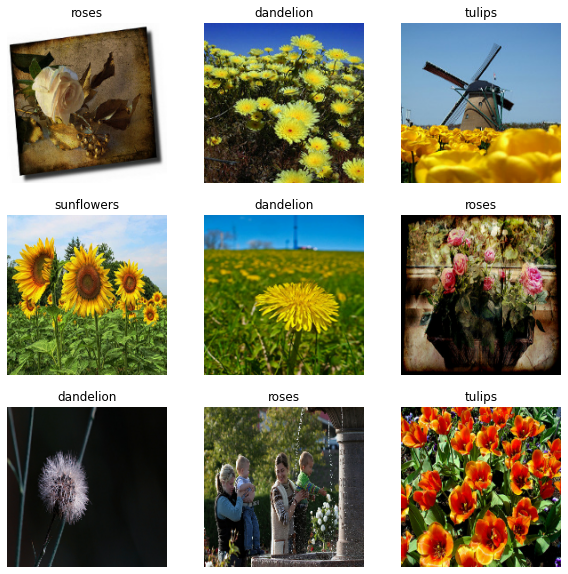

In [3]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

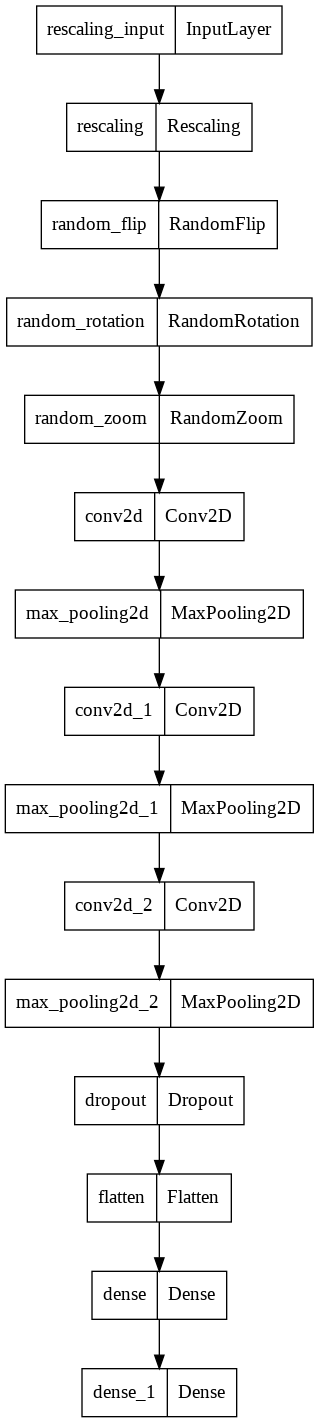

In [5]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.RandomFlip("horizontal", 
                    input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='silu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
plot_model(model)

In [7]:
epochs = 10
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/10
92/92 [==============================] - 6s 68ms/step - loss: 1.1056 - accuracy: 0.5463 - val_loss: 1.1205 - val_accuracy: 0.5450
Epoch 2/10
92/92 [==============================] - 6s 69ms/step - loss: 1.0528 - accuracy: 0.5753 - val_loss: 1.0437 - val_accuracy: 0.5722
Epoch 3/10
92/92 [==============================] - 6s 66ms/step - loss: 0.9847 - accuracy: 0.6083 - val_loss: 0.9807 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 6s 67ms/step - loss: 0.9337 - accuracy: 0.6216 - val_loss: 1.0412 - val_accuracy: 0.5845
Epoch 5/10
92/92 [==============================] - 6s 66ms/step - loss: 0.8823 - accuracy: 0.6482 - val_loss: 0.9753 - val_accuracy: 0.6294
Epoch 6/10
92/92 [==============================] - 6s 67ms/step - loss: 0.8401 - accuracy: 0.6638 - val_loss: 0.9430 - val_accuracy: 0.6567
Epoch 7/10
92/92 [==============================] - 6s 67ms/step - loss: 0.8049 - accuracy: 0.6843 - val_loss: 0.8949 - val_accuracy: 0.6689
Epoch 8/10
92